In [1]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 
from function import Region
SelectShapeStd = Region.SelectShapeStd

def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

In [4]:
matrix = [[3,1,2],[2,4,6],[7,8,9],]
mean =np.mean(matrix)
mean

4.666666666666667

# **Select Contour**
* Contour Feature 
  1. area = cv2.contourArea(cnt)
  2. perimeter = cv2.arcLength(cnt,True)
  3. epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
  4. hull = cv2.convexHull(cnt)
  5. x,y,w,h = cv2.boundingRect(cnt)
  6. rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

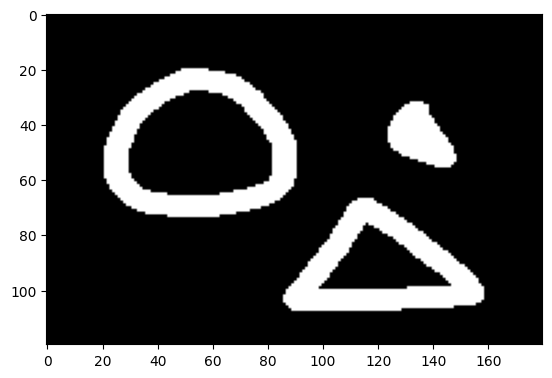

In [2]:
img  = cv2.imread("../images/shape.png")
gray = cv2.imread("../images/shape.png",0)


img   = cv2.resize(img, (180, 120))
gray  = cv2.resize(gray, (180, 120))

_, threshold  = cv2.threshold(gray,200, 255 , cv2.THRESH_BINARY_INV)
show(threshold)

In [3]:
#threshold1 = SelectShapeStd(threshold,mode ="width" )
contours , _  = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
len(contours)

print(type(contours))



<class 'tuple'>


In [4]:
def drawCnt(img, cnt):
    img_copy = img.copy()
    
    cv2.drawContours(img_copy,cnt, -1,  (255,0,0), 2 )
    return img_copy
    

In [5]:
rect = cv2.minAreaRect(contours[1])
rect[2]

59.03623962402344

In [6]:
def SelectContour(contours, min_value = 0, max_value = 0, factor =0.01, feature = "width"):
    """
        Features:
            1. width
            2. height
            3. area
            4. length
            5. circularity
            6. alpha
            7. approximate
            8. anisometry
    
    """
    contour_selected = []
    
    list_feature = []
    for cnt in contours:
        
        if feature == "width" :
            _,_, width, height = cv2.boundingRect(cnt)
            if  width >= min_value and width <= max_value:
                contour_selected.append(cnt)
                list_feature.append(width)
                
        elif feature == "height" :
            _,_, width, height = cv2.boundingRect(cnt)
            if  height >= min_value and height <= max_value:
                contour_selected.append(cnt)
                list_feature.append(height)
                
        elif feature == "area":
            area = cv2.contourArea(cnt)
            if  area >= min_value and area <= max_value:
                contour_selected.append(cnt)
                list_feature.append(area)
                
        elif feature == "length": # P 
            per = cv2.arcLength(cnt,True)
            if  per >= min_value and per <= max_value:
                contour_selected.append(cnt)
                list_feature.append(per)
                
        elif feature == "circularity":
            dis = []
            area = cv2.contourArea(cnt)
            
            moment = cv2.moments(cnt)
            center_x = moment["m10"] / moment["m00"]
            center_y = moment["m01"] / moment["m00"]
            
            for point in cnt: 
                x_codinate = point[0][0]
                y_codinate = point[0][1]
                d = math.sqrt((x_codinate - center_x)**2 + (center_y - y_codinate)**2)
                dis.append(d)
                    
            max_dis = max(dis)
            cicularity  = area / (math.pi * max_dis**2)
            if  cicularity >= min_value and cicularity <= max_value:
                contour_selected.append(cnt)
                list_feature.append(cicularity)
            
        elif feature == "alpha": # Hinh chu nhat nghieng bao nhieu do so voi truc 0Y
            rect = cv2.minAreaRect(cnt)
            alpha = rect[2]
            if  alpha >= min_value and alpha <= max_value:
                contour_selected.append(cnt)
                list_feature.append(alpha)
                
        elif feature == "approximate":
            epsilon = factor * cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,epsilon,True)
            
            if len(approx) >= min_value and len(approx) <= max_value:
                contour_selected.append(approx)
                list_feature.append(len(approx))
                
        elif feature == "anisometry":
            moment = cv2.moments(cnt)
            
            center_x = moment["m10"] / moment["m00"]
            center_y = moment["m01"] / moment["m00"]
            
            def calc_moment(contours):
                m20 = 0 
                m02 = 0 
                m11 = 0 
        
                for point in contours: 
                    x_codinate = point[0][0]
                    y_codinate = point[0][1]
                    
                    m20 += (x_codinate - center_x) **2 
                    m02 += (y_codinate - center_y) **2 
                    
                    m11 = (x_codinate - center_x) * (y_codinate - center_y)
                return m20 , m02 , m11

            def calc_anisometry (m20 , m02 , m11 ):
                R_a = math.sqrt(8* (m20 + m02 + math.sqrt((m20 -m02 )**2 + 4 * m11**2))) / 2 
                R_b = math.sqrt(8* (m20 + m02 - math.sqrt((m20 -m02 )**2 + 4 * m11**2))) / 2
                
                return R_a / R_b
            
            m20 , m02 , m11 = calc_moment(cnt)
            anisometry = calc_anisometry(m20 , m02 , m11)
            if anisometry >= min_value and anisometry <= max_value:
                contour_selected.append(cnt)
                list_feature.append(anisometry)
            
                            
                            
    print(f'features - {feature}: {list_feature}')          
    return contour_selected     

contour_selected = SelectContour(contours , min_value = 4, max_value = 100,factor = 0.001,  feature= "approximate", )

features - approximate: [54, 37, 80]


In [7]:
# Features:
#             1. width
#             2. height
#             3. area
#             4. length
#             5. circularity
#             6. alpha
#             7. approximate
#             8. anisometry
def selectcontour(contours, minval = 0, maxval = 0, factor = 0, feature ='width'):
    list_contour = []
    feature_infor = []

    for cnt in contours:
        if feature =='width':
            x,y,w,h = cv2.boundingRect(cnt)
            if minval <= w and maxval >= w:
                list_contour.append(cnt)
                feature_infor.append(w)

        elif feature == 'height':
            x,y,w,h = cv2.boundingRect(cnt)
            if minval <= h and maxval >= h:
                list_contour.append(cnt)
                feature_infor.append(h)

        elif feature =='area':
            area = cv2.contourArea(cnt)
            if minval <= area and maxval >= area:
                list_contour.append(cnt)
                feature_infor.append(area)

        elif feature == 'circularity':
            mm = cv2.moments(cnt)
            x1 = int(mm['10']/mm['m00'])
            y1 = int(mm['01']/mm['m00'])
            Area = cv2.contourArea(cnt)

            list_dist = []
            for p in cnt:
                dis = math.sqrt((p[0][0] - x1)**2+(p[0][1] - y1)**2)
                list_dist.append(dis)
            cirularity = Area / (math.pi*(max(list_dist)**2))
            if minval <= cirularity and maxval >= cirularity:
                list_contour.append(cnt)
                feature_infor.append(max(list_dist))   

        elif feature == 'alpha':
            infor = cv2.minAreaRect(cnt)
            alpha = infor[2]
            if minval <= alpha and maxval >= alpha:
                list_contour.append(cnt)
                feature_infor.append(alpha)

        elif feature == 'approximate':
            epsilon = factor * cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt,epsilon,True)

            if minval <= len(approx) and maxval >= len(approx):
                feature_infor.append(len(approx))
                list_contour.append(cnt)
        elif feature == 'anisometry':
            mm = cv2.moments(cnt)
            x1 = mm['m10']/mm['m00']
            y1 = mm['m01']/mm['m00']

            def cal_momment(cnt):
                m20 = 0
                m02 = 0
                m11 = 0
                for p in cnt:
                    px1 = p[0][0]
                    py1 = p[0][1]
                    
                    m20 = (x1 - px1)**2
                    m02 = (y1 - py1)**2
                    m11 = (x1 - px1) * (y1 - py1)
                return m20, m02, m11
            def cal_anisometry(m20,m02,m11):
                R_a = math.sqrt(8* (m20 + m02 + math.sqrt((m20 -m02 )**2 + 4 * m11**2))) / 2 
                R_b = math.sqrt(8* (m20 + m02 - math.sqrt((m20 -m02 )**2 + 4 * m11**2))) / 2
                return R_a/R_b
            m20, m02, m11 = cal_momment(cnt)
            anisometry = cal_anisometry(m20,m02,m11)

            if minval <= anisometry and maxval >= anisometry:
                feature_infor.append(anisometry)
                list_contour.append(cnt)
        elif feature == 'length':
            arclen = cv2.arcLength(cnt, True)
            if minval <= arclen and maxval >= arclen:
                feature_infor.append(arclen)
                list_contour.append(cnt)

    print(f'features - {feature}: {feature_infor} - length of list cnt {len(list_contour)}') 
    

    return list_contour

In [8]:
contour_selected1 = selectcontour(contours , minval = 1, maxval = 50,factor = 0.001,  feature= "width")

features - width: [25] - length of list cnt 1


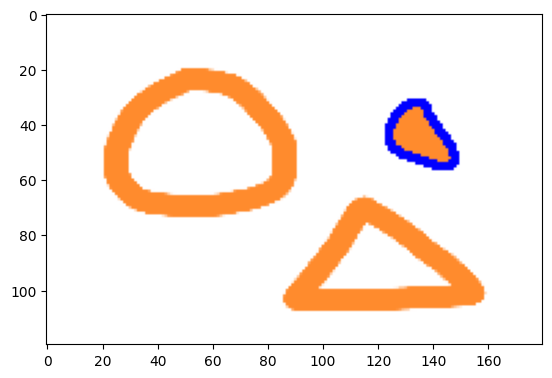

In [9]:
cntdr = drawCnt(img,contour_selected1)
showC(cntdr)

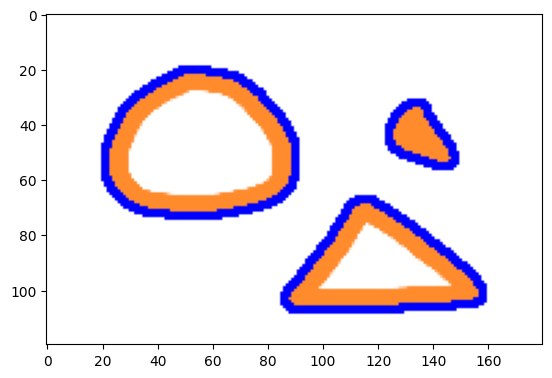

In [10]:
img_draw = drawCnt(img, contour_selected)
showC(img_draw)

In [11]:
epsilon = 0.005*cv2.arcLength(contours[0],True)
approx = cv2.approxPolyDP(contours[0],epsilon,True)
print(len(approx))

13


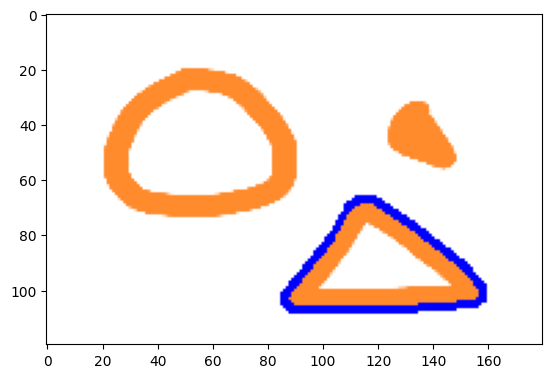

In [12]:
img_draw = drawCnt(img, [approx])
showC(img_draw)

# **Hough Line Transform**

1. Hough Line Transform
cv2.HoughLines(source, r_resolution,alpha_resolution, number_point, None, 0, 0)
1. Hough LineP Transform
linesP = cv.HoughLinesP(source, r_resolution, alpha_resolution, number_point, None, minLineLength, maxLineGap)

index:2
number contour: 1


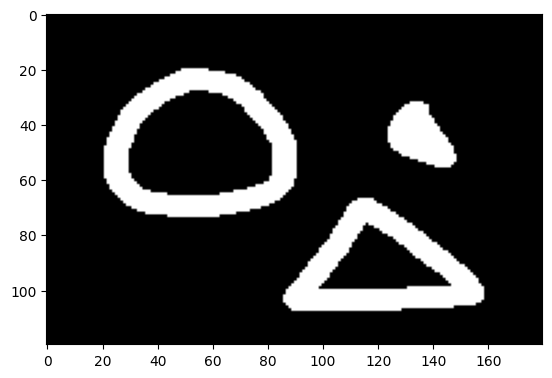

In [13]:
img1  = cv2.imread("../images/line.png")
gray1 = cv2.imread("../images/line.png",0)

_, threshold1  = cv2.threshold(gray1,10, 255 , cv2.THRESH_BINARY_INV)

threshold1 = SelectShapeStd(threshold1,mode ="width" )
contours , _  =cv2.findContours(threshold1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print(f'number contour: {len(contours)}')

show(threshold)

## Hough Line Transform

[[[717.          1.1519173]]]


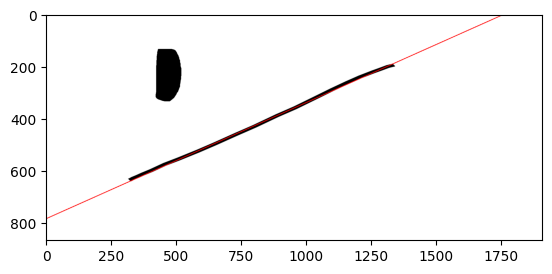

In [14]:
img_copy = img1.copy()

lines = cv2.HoughLines(threshold1, 1, np.pi / 180, 1103,  None, 0, 0)
print(lines)

for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 2000*(-b)), int(y0 + 2000*(a)))
    pt2 = (int(x0 - 2000*(-b)), int(y0 - 2000*(a)))
    cv2.line(img_copy, pt1, pt2, (0,0,255),2)
    
showC(img_copy)

## HoughLineP Transform

(3, 1, 4)


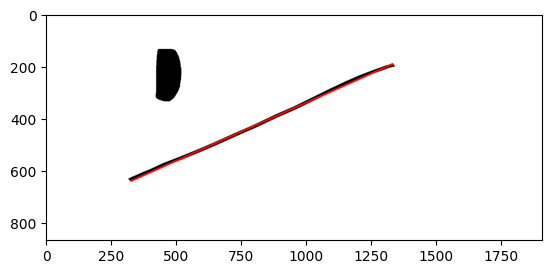

In [15]:
img5_copy = img1.copy()
linesP = cv2.HoughLinesP(threshold1, 1, np.pi / 180, 1000, None, 10, 80)
print(linesP.shape)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(img5_copy, (l[0], l[1]), (l[2], l[3]), (255,0,0),5, cv2.LINE_AA)
        break
    
show(img5_copy)

# **Hough Circle Transform**

* cv2.HoughCircles(threshold,cv2.HOUGH_GRADIENT,20,255, param1=20,param2=100,minRadius=0,maxRadius=200) 
* image	8-bit, single-channel, grayscale input image.
* circles	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .
* method	Detection method, see HoughModes. The available methods are HOUGH_GRADIENT and HOUGH_GRADIENT_ALT.
*  dp	Inverse ratio of the accumulator resolution to the image resolution. For example, if dp=1 , the accumulator has the same resolution as the input image. If dp=2 , the accumulator has half as big width and height. For HOUGH_GRADIENT_ALT the recommended value is dp=1.5, unless some small very circles need to be detected.
* minDist	Minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
* param1	First method-specific parameter. In case of HOUGH_GRADIENT and HOUGH_GRADIENT_ALT, it is the higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). Note that HOUGH_GRADIENT_ALT uses Scharr algorithm to compute image derivatives, so the threshold value shough normally be higher, such as 300 or normally exposed and contrasty images.
* param2	Second method-specific parameter. In case of HOUGH_GRADIENT, it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first. In the case of HOUGH_GRADIENT_ALT algorithm, this is the circle "perfectness" measure. The closer it to 1, the better shaped circles algorithm selects. In most cases 0.9 should be fine. If you want get better detection of small circles, you may decrease it to 0.85, 0.8 or even less. But then also try to limit the search range [minRadius, maxRadius] to avoid many false circles.
* minRadius	Minimum circle radius.
*  maxRadius	Maximum circle radius. If <= 0, uses the maximum image dimension. If < 0, HOUGH_GRADIENT returns centers without finding the radius. HOUGH_GRADIENT_ALT always computes circle radiuses. 

index:1


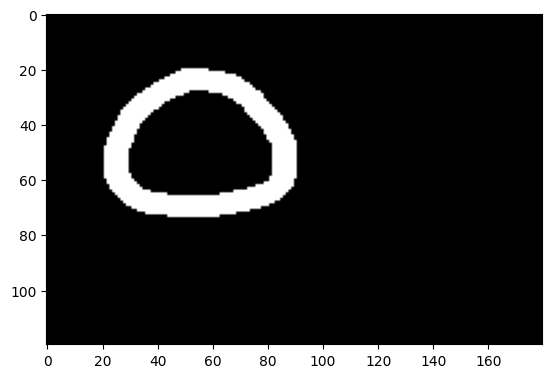

In [16]:
threshold = SelectShapeStd(threshold,mode ="area" )
contours , _  =cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
show(threshold)

## Draw Contour on Mask

In [17]:
def drawContourMask(img, cnt):
    
    mask = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8)
    
    cv2.drawContours(mask,cnt, -1,  (255),2)
    
    return mask

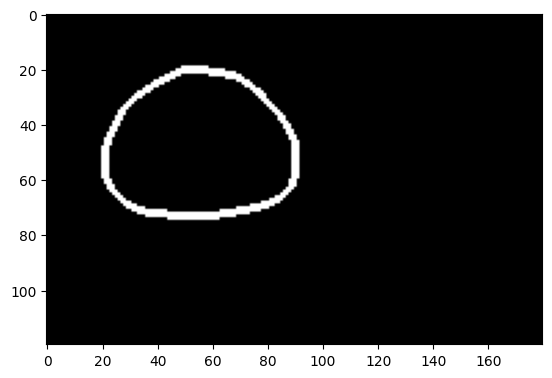

In [18]:
contour_region = drawContourMask(gray, contours[0])
show(contour_region)

## From Scratch


In [19]:
num_a = np.arange(0,100, 1 )
num_a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [20]:
def hough_circle_transform(image , a_res = 1, b_res = 1, r_res = 1):
    """
        image: binary
    
    """
    height, width = image.shape[0], image.shape[1]
    
    
    max_r = int(math.sqrt( width**2 + height**2))
    
    num_a = np.arange(0,width, a_res )
    num_b = np.arange(0,height, b_res )
    num_r = np.arange(0,max_r, r_res )
    
    
    shape_a = int(width / a_res)
    shape_b = int(height / b_res)
    shape_r = int(max_r / r_res)
    
    cummulator = np.zeros((shape_b,shape_a,shape_r), dtype= np.uint)
       
    for y in range(height):
        for x in range(width):
            if image[y,x] == 255:
                for idx_b, b in enumerate(num_b):
                    for idx_a, a in enumerate(num_a):
                        r = int(math.sqrt((y - b)**2 + (x - a)**2))
                        cummulator[idx_b, idx_a, r] +=1 
                
                
    max_numper_point = max(cummulator.flatten())
    
    return max_numper_point, cummulator, num_a, num_b, num_r
              

def find_circle(cummulator,num_a, num_b, num_r, threshold_number_circle = 10,  threshold_r = 100):
    
    C = []
    
    for idx_b, b in enumerate(num_b):
        for idx_a, a in enumerate(num_a): 
            for idx_r, r in enumerate(num_r): 
                
                if cummulator[idx_b, idx_a,idx_r] >= threshold_number_circle: 
                    if r >=threshold_r:
                        
                        C.append(((b,a), r))
    
    return C 

In [21]:
# CODE FROM SCRACTH

def hl_circle(img, a_res = 1, b_res = 1, r_res = 1):

    h, w = img.shape[0], img.shape[1]
    max_r = int(math.sqrt(w**2 + h**2))
    a = np.arange(0, w, a_res)
    b = np.arange(0, h, b_res)
    r = np.arange(0, max_r, r_res)

    len_a = int(w/a_res)
    len_b = int(h/b_res)
    len_r = int(max_r/r_res)

    ref_space = np.zeros((len_b,len_a,len_r), dtype=np.uint)

    for y in range(h):
        for x in range(w):
            if img[y,x] == 255:

                for idx_b, B in enumerate(b):
                    for idx_a, A in enumerate(a):
                        R = int(math.sqrt((y - B)**2 + (x - A)**2))
                        ref_space[idx_b, idx_a, R] += 1

    max_point = max(ref_space.flatten())

    return max_point,a,b,r,ref_space

def Find_circle(ref_space, a, b, r, threshold_r = 10, point_of_circle = 100):
    C = []

    for idx_a, ae in enumerate(a):
        for idx_b, be in enumerate(b):
            for idx_r, re in enumerate(r):

                if ref_space[idx_b, idx_a, idx_r] >= point_of_circle:
                    if re >= threshold_r:
                        C.append(((be, ae), re))
    return C
    

In [22]:
# code from scratch

max_p, A,B,R,ref_sp = hl_circle(contour_region,a_res = 1, b_res = 1, r_res = 1)

In [23]:
print(f'{max_p}')

128


In [24]:
c = Find_circle(ref_sp, A, B, R, threshold_r = 30, point_of_circle = 120)

In [25]:
print(len(c))

2


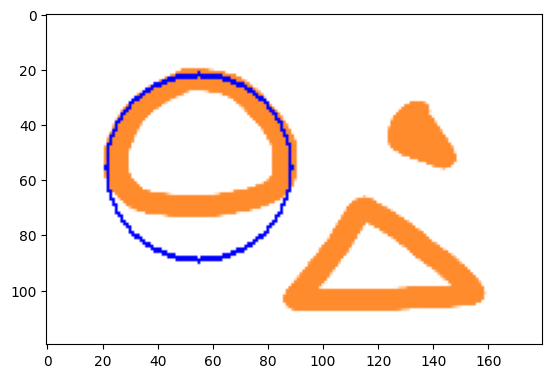

In [36]:
image1  = img.copy()

for C in c:
    (y,x), r = C
    cv2.circle(image1,(int(y),int(x)),r,(255,0,0),1)
    
showC(image1)

In [27]:
max_numper_point, cummulator, num_a, num_b, num_r = hough_circle_transform(contour_region , a_res = 1, b_res = 1, r_res = 1)

In [28]:
print(max_numper_point)

128


In [29]:
C = find_circle(cummulator, num_a, num_b, num_r, threshold_number_circle = 120,  threshold_r = 30)
print(len(C))

2


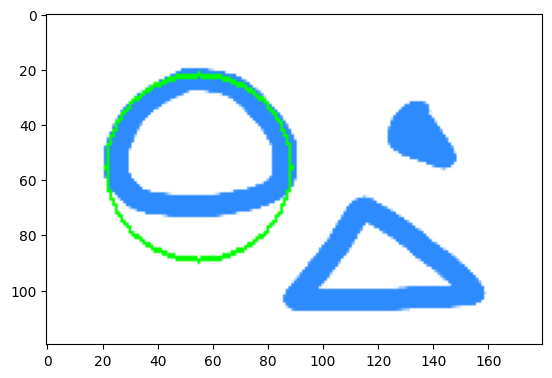

In [30]:
img_copy = img.copy()

for circle in C:
    (b,a), r = circle
    cv2.circle(img_copy,(int(b), int(a)),r,(0,255,0),1)
    
show(img_copy)

# OpenCV

In [37]:
img_copy =img.copy()
circles = cv2.HoughCircles(threshold,cv2.HOUGH_GRADIENT,20, 255, param1=20, param2=100, minRadius=0, maxRadius=200)
circles = np.uint16(np.around(circles))
print(circles)

[[[50 50 32]]]


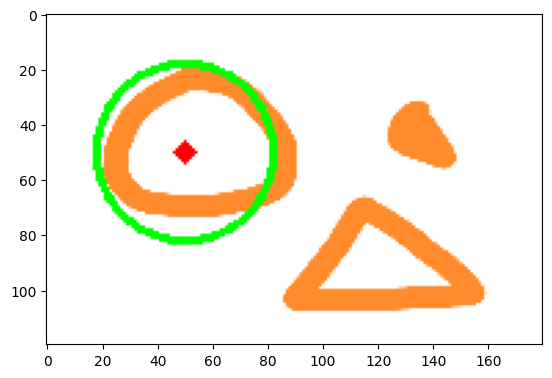

In [38]:
img_copy = img.copy()

for i in circles[0,:]:
    cv2.circle(img_copy,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(img_copy,(i[0],i[1]),2,(0,0,255),3)
    
showC(img_copy)